### План
- Приветствие и знакомство. Что мы сегодня узнаем и в какой форме? Основная идея в том, что часто для решения даже практических задач нужно знать теорию, которая напрямую не относится к задаче. Исключительно для упрощения кодирования.
- Напомнить некоторые геометрические понятия
  - Ориентация точек и нормаль к плоскости
  - Как проверить, с какой стороны от плоскости лежит точка, уравнение плоскости
- Напомнить, что такое выпуклая оболочка. Её основные свойства.
  - Ориентированные грани выпуклой оболочки содержат все точки "справа"
- Восстановление поверхности.
  - постановка задачи
  - восстановление нормалей к точкам
  - фильтрация граней
- Диаграмма Вороного ячейка ДВ, пересечение полуплоскостей
- Пересечение полуплоскостей, точка внутри
- Однородные координаты
- Граф Делоне, триангуляция Делоне
  - Триангуляция на сфере
  - Триангуляция на плоскости
- Сводим всё вместе

### Освежим память
- векторы, точки, скалярное произведение, разложение вектора, системы координат
- матрица перевода координат вектора из системы координат $A$ в $B$:
  $$ \left( \begin{array}{ccccc}
  a_{11} & a_{12} & a_{13} & \ldots & a_{1n} \\
  a_{21} & a_{22} & a_{23} & \ldots & a_{2n} \\
  \vdots & \vdots & \vdots & \vdots & \vdots \\
  a_{n1} & a_{n2} & a_{n3} & \ldots & a_{nn} \\
  \end{array} \right)
  $$
- точку можно представить вектором, отложенным от начала какой-либо системы координат
- если есть $n+1$ точек, не лежащих на одной плоскости, матрица перехода может быть записана как
  $$ T = \left( \begin{array}{ccccc}
  a_{11} - p_1 & a_{12} - p_2 & a_{13} - p_3 & \ldots & a_{1n} - p_n \\
  a_{21} - p_1 & a_{22} - p_2 & a_{23} - p_3 & \ldots & a_{2n} - p_n \\
  \vdots & \vdots & \vdots & \vdots & \vdots \\
  a_{n1} - p_1 & a_{n2} - p_2 & a_{n3} - p_3 & \ldots & a_{nn} - p_n \\
  \end{array} \right)
  $$
  Знак определителя $det(T)$ совпадает со знаком определителя матрицы
  $$ T' = \left| \begin{array}{cccccc}
  a_{11} & a_{12} & a_{13} & \cdots & a_{1n} & 1 \\
  a_{21} & a_{22} & a_{23} & \cdots & a_{2n} & 1 \\
  \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
  a_{n1} & a_{n2} & a_{n3} & \cdots & a_{nn} & 1 \\
  p_1 & p_2 & p_3 & \cdots & p_n & 1 \\
  \end{array} \right|
  $$
  $T'$ $-$ ориентация (поворот) $n+1$ точки в $n$-мерном пространстве
- точки $a_{1..n}$ задают некоторую плоскость, а точка $p$ находится _слева_ от плоскости, если соответствующий определитель положителен и _справа_, если отрицателен

## Выпуклая оболочка

Выпуклая оболочка $CH$ множества точек $P$, $CH(P)$ — минимальное по включению выпуклое множество, содержащее $P$.

### Выпуклая оболочка на плоскости

In [3]:
# %pylab inline

import numpy as np
import matplotlib.pyplot as plt

from pyhull.convex_hull import ConvexHull

X, Y = np.random.uniform(1, 9, size=(2, 30))
ch = ConvexHull(np.transpose([X, Y]))

plt.plot(X, Y, "ro")
for v in ch.vertices:
    plt.plot(X[v], Y[v], "g")
    
plt.axis([0, 10, 0, 10])
plt.show()

ImportError: No module named 'pyhull'

### Оболочка в 3D

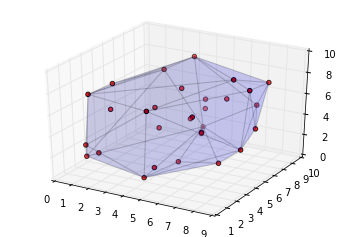

In [5]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from pyhull.convex_hull import ConvexHull

X, Y, Z = np.random.uniform(1, 9, size=(3, 30))
ch = ConvexHull(np.transpose([X + [10], Y + [10] , Z + [10]]))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X, Y, Z, c='r')
ax.plot_trisurf(X, Y, Z, alpha=0.1, triangles=ch.vertices)
    
plt.show()

### Восстановление поверхностей

Дано множество $P$ точек гладкой поверхности $S$. Как _триангулировать_ $P$ так, чтобы триангуляция была бы гомеоморфна исходной поверхности? 

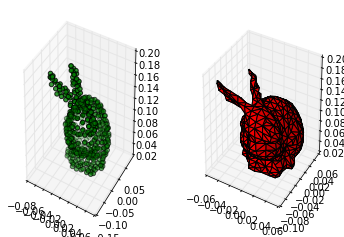

In [6]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

with open("resources/bun_zipper_res4.off") as inp:
    inp.readline() # OFF
    v, f, _ = map(int, inp.readline().split()) # vertices count, faces count, edges count
    X, Y, Z = np.transpose([list(map(float, inp.readline().split())) for _ in range(v)]) # vertices
    surface = [list(map(int, inp.readline().split()[1:])) for _ in range(f)] # edges
    
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d', aspect="equal")
ax.scatter(Z, X, Y, c='g')

ax = fig.add_subplot(122, projection='3d', aspect="equal")
ax.plot_trisurf(Z, X, Y, triangles=surface, color='r', linewidth=1)

plt.show()

Один из самых простых для реализации алгоритмов: "A simple algorithm for homeomorphic surface reconstruction" за авторством N. Amenta, S. Choi, T.K. Dey и N. Leekha (2000).

### Диаграмма Вороного

Ячейка диаграммы Вороного для точки $p_i$ получается пересечением полуплоскостей, образованных серединными перпендикулярами пар точек $(p_i, p_j),\space j \ne i$.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib

np.random.seed(239)
points = np.random.rand(200,2)
points[72] = (0, 0)

vor = Voronoi(points)
    
ax = plt.subplot()
voronoi_plot_2d(vor, ax, line_width=10, show_vertices=False, show_points=False)

for region in vor.regions:
    if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon), alpha=0.3)

def plot_segment(ps, color='black', **kwargs):
    ax.plot([p[0] for p in ps], 
            [p[1] for p in ps], color=color, **kwargs)

size = 0.003
min_x, min_y, max_x, max_y = 0.3, 0.3, 0.6, 0.6
for (i, j), (va, vb) in vor.ridge_dict.items():
    if -1 in vor.regions[vor.point_region[i]] + vor.regions[vor.point_region[j]]:
        continue  # ignore infinite regions
    pi, pj = points[i], points[j]
#     if np.any(pi < [min_x, min_y]) or np.any(pi > [max_x, max_y])\
#         or np.any(pj < [min_x, min_y]) or np.any(pj > [max_x, max_y]):
#         continue  # working only if both vertices are in ROI
    if 74 not in (i, j):
        continue
    if 74 not in (i, j):
        continue
        
    print(i, j)
        
    plot_segment([pi, pj], linestyle='-', linewidth=0.3)  # plotting line between vertices
    m = (pi + pj) / 2
    a = (pj - pi) / np.linalg.norm(pj - pi)
    va, vb = vor.vertices[va], vor.vertices[vb]
    b = (vb - va) / np.linalg.norm(vb - va)
    if (np.linalg.norm(m - b*size - va) > np.linalg.norm(m + b*size - va)):
        plot_segment([va, m - b*size], linestyle='-', linewidth=0.5)
    else:
        plot_segment([va, m + b*size], linestyle='-', linewidth=0.5)
    plot_segment([m + b * size, m + b * size + a * size, m + a * size], linewidth=0.3)  # 90 degree angle
    plot_segment([m - b * size, m - b * size - a * size, m - a * size], linewidth=0.3)  # 90 degree angle
    c = np.random.rand(3, 1)
    plot_segment([(pi + m) / 2 - b * size/2, (pi + m) / 2 + b * size/2], linewidth=3.0, color=c)  # equal segments stroke
    plot_segment([(pj + m) / 2 - b * size/2, (pj + m) / 2 + b * size/2], linewidth=3.0, color=c)  # equal segments stroke

ax.axis([min_x, max_x, min_y, max_y])
plt.axis('off')
ax.set_aspect('equal')
plt.show()

3 74
74 143
80 74
74 68
74 106


### Пересечение полуплоскостей

Рассмотрим множество полуплоскостей, заданных нормалью $n$ и точкой $p$ на прямой, ограничивающей соответствующую полуплоскость (напомню неравенство для $i$-й полуплоскости: $n_i \cdot (p - p_i) \le 0$). Пусть пересечение полуплоскостей $CP$ непусто и нам известна точка $q \in int(CP)$. Передвинем систему координат в точку $q$. Уравнения полуплоскостей изменятся на величину $n_i \cdot p_i$, которая станет положительной для всех полуплоскостей, что позволит переписать все уравнения в виде $a_i x + b_i y + c_i \ge 0, \space c_i \gt 0$. 

Полуплоскостям $(a_i, b_i, c_i)$ в исходном пространстве будут соответствовать точки $d_i = (\frac{a_i}{c_i}, \frac{b_i}{c_i})$ в _двойственном пространстве_. Построим в двойственном пространстве выпуклую оболочку $CH$ множества точек $\{d_i\} \cup \{0\}$.

### Пересечение полуплоскостей (2)

Рассмотрим множество полуплоскостей, заданных нормалью $n$ и точкой $p$ на прямой, ограничивающей соответствующую полуплоскость (напомню неравенство для $i$-й полуплоскости: $n_i \cdot (p - p_i) \le 0$). Потребуем, чтобы все нормали были ориентированы вертикально, то есть, чтобы $n_y \gt 0$. Точка $(x,y)$ пересечения прямых, ограничивающих полуплоскости, является решением системы уравнений:

$$
\left\{
    \begin{array}{ll}
        n_{1x} x + n_{1y} y = n_1 \cdot p_1\\
        n_{2x} x + n_{2y} y = n_2 \cdot p_2
    \end{array}
\right.
$$

$$
x = \frac{
    \begin{vmatrix}
    n_1 \cdot p_1 && n_{1y} \\
    n_2 \cdot p_2 && n_{2y}
    \end{vmatrix}}{
    \begin{vmatrix}
    n_{1x} && n_{1y} \\
    n_{2x} && n_{2y} 
    \end{vmatrix}}\space\space\space
y = \frac{
    \begin{vmatrix}
    n_{1y} && n_1 \cdot p_1 \\
    n_{2y} && n_2 \cdot p_2
    \end{vmatrix}}{
    \begin{vmatrix}
    n_{1x} && n_{1y} \\
    n_{2x} && n_{2y} 
    \end{vmatrix}}
$$

Заметим, что если нормали $n_1, n_3$ и $n_2$ упорядочены по повороту и точка пересечения прямых $l_1$ и $l_2$ лежит в полуплоскости $h_3$, то эту полуплоскость можно выкинуть из рассмотрения: вклад в пересечение полуплоскостей она не даёт. ![Пересекающиеся полуплоскости](images/intersecting_segments.svg) Это условие выражается формулой $n_{3x} x + n_{3y} y - n_3 \cdot p_3 \lt 0$. Упорядоченность по повороту даёт знак определителя

$$
\begin{vmatrix}
    n_{1x} && n_{1y} \\
    n_{2x} && n_{2y} 
\end{vmatrix} \lt 0
$$

Домножим на него, получим

$$
n_{3x} \begin{vmatrix} n_1 \cdot p_1 && n_{1y} \\ n_2 \cdot p_2 && n_{2y} \end{vmatrix} + 
n_{3y} \begin{vmatrix} n_{1y} && n_1 \cdot p_1 \\ n_{2y} && n_2 \cdot p_2 \end{vmatrix} -
n_3 \cdot p_3 \begin{vmatrix} n_{1x} && n_{1y} \\ n_{2x} && n_{2y} \end{vmatrix} \gt 0
$$

Что эквивалентно

$$
\begin{vmatrix}
    n_{1x} && n_1 \cdot p_1 && n_{1y} \\
    n_{2x} && n_2 \cdot p_2 && n_{2y} \\
    n_{3x} && n_3 \cdot p_3 && n_{3y}
\end{vmatrix} \gt 0
$$

Что эквивалентно проверке поворота в двойственном пространстве точек с _однородными координатами_ $(n_{ix}, n_i \cdot p_i, n_{iy})$ или, после деления на $n_{iy}$:

$$
\left(\frac{n_{ix}}{n_{iy}}, \frac{n_i \cdot p_i}{n_{iy}}, 1\right)
$$

Отметим, что точкам, упорядоченным по координате $x$ соответствуют полуплоскости, упорядоченные по повороту нормалей.

Таким образом, _верхняя оболочка_ множества точек в двойственном пространстве даст последовательность полуплоскостей, составляющих границу пересечения.

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from pyhull.convex_hull import ConvexHull
from math import sqrt


def process_data(Nx, r):
    Ny = np.ones(len(Nx)) - Nx**2
    X, Y = r[:, 0], r[:, 1]

    Xd, Yd = Nx / Ny, -(Nx * X + Ny * Y) / Ny

    ch = ConvexHull(np.transpose([Xd, Yd]))

    ax = plt.subplot(1, 2, 1, aspect="equal")

    for i, (x, y, nx, ny) in enumerate(zip(X, Y, Nx, Ny), 1):
        ax.arrow(x, y, nx, ny, head_width=0.05, head_length=0.1, fc="k", ec="k")
        ax.plot([x + ny * 100, x - ny * 100], 
                [y - nx * 100, y + nx * 100], "g", alpha=0.3)
        ax.text(x, y, i)

    ax.axis([0, 10, 0, 10])

    ax = plt.subplot(1, 2, 2)

    ax.plot(Xd, Yd, "ro")
    for i, (x, y) in enumerate(zip(Xd, Yd), 1):
        ax.text(x, y, i)

    for v in ch.vertices:
        if Xd[v[0]] > Xd[v[1]]:
            ax.plot(Xd[v], Yd[v], "g")

    plt.show()
    
process_data(np.array([-0.9, -0.5, -0.25, 0, 0.45, 0.8]), 
             np.array([[1, 2], [2, 4], [3, 6], [4, 5], [6, 4], [7, 3]]))

npoints = 9
np.random.seed(42)
process_data(np.random.uniform(-1, 1, size=npoints),
             np.random.uniform(1, 9, size=(npoints, 2)))


### Пересечение полуплоскостей (3)

В предыдущих разделах жестко использовался факт существования точки, принадлежащей пересечению полуплоскостей. Как получить пересечение полуплоскостей, используя только функцию, вычисляющую выпуклую оболочку?

### Триангуляция Делоне на плоскости

Рассмотрим _триангуляцию_ $T$ множества точек $P$. $T$ называется _триангуляцией Делоне_, если внутренность проведённого около любого треугольника $t \in T$ круга $c$ не содержит точек из $P$. Сопоставим каждой точке $p \in P$ точку $p' = (p_x, p_y, p^2)$ (спроецируем точки на параболоид). Из уравнения полупространства $n \cdot (p - p_0) \le 0$ и параболоида $z=x^2+y^2$ следует, что множество точек пересечения параболоида полупространством будет удовлетворять уравнению $ax+by+c(x^2+y^2)+d \le 0$, что является уравнением круга $(p - p_0)^2 \le r^2$ в случае, если нормаль к плоскости $n=(a, b, c)$ будет направлена вверх ($c \gt 0$).

Чему будет эквивалентна триангуляция Делоне?

In [5]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d', aspect="equal")
X = np.arange(1, 9, 0.25)
Y = np.arange(1, 9, 0.25)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2, color="g",
                       linewidth=0, antialiased=False)
ax.set_zlim(0, 200)
ax.axis([0, 10, 0, 10])

r = np.random.uniform(2, 8, size=(20, 2))
X, Y = r[:, 0], r[:, 1]
Z = X ** 2 + Y ** 2
ax.scatter(X, Y, np.zeros(len(r)), c="r", s=3)
ax.scatter(X, Y, Z, c="b", s=3)

ch = ConvexHull(np.transpose([X, Y, Z]))
triangles = [v for v in ch.vertices if np.linalg.det([X[v], Y[v], np.ones(3)]) > 0]
ax.plot_trisurf(X, Y, Z, alpha=0.4, triangles=triangles, color="b")
ax.plot_trisurf(X, Y, np.zeros(len(r)), alpha=0.4, triangles=triangles, color="b")

for x, y in r:
    ax.plot([x, x], [y, y], "gray", alpha=0.3, zs=[0, x**2 + y**2])

plt.show()

### Триангуляция Делоне в 3D

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from pyhull.convex_hull import ConvexHull

np.random.seed(321)
X, Y, Z = np.random.uniform(1, 9, size=(3, 15))
W = X**2 + Y**2 + Z**2
ch = ConvexHull(np.transpose([X, Y, Z, W]))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', aspect="equal")

for v in ch.vertices:
    if np.linalg.det([X[v], Y[v], Z[v], np.ones(4)]) < 0:
        t = v + [v[1], v[0], v[2], v[0], v[3]]
        ax.plot(X[t], Y[t], "g", zs=Z[t])

ax.scatter(X, Y, Z, c="b")

ax.axis([0, 10, 0, 10])
ax.set_zlim(0, 10)

plt.show()

### Триангуляция Делоне на сфере

Аналогично введём триангуляцию Делоне на сфере. Рассмотрим множество точек $P$ на сфере $S$. Скажем, что _триангуляция_ множества точек $P$ является _триангуляцией Делоне_, если внутренность описанного около каждого треугольника $t$ _круга_ $c$ не содержит точек из $P$. Существование триангуляции Делоне следует из того, что окружность — это пересечение плоскости, а круг — это пересечение полупространства со сферой $S$.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from pyhull.convex_hull import ConvexHull

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', aspect="equal")

a, b, c, d = 0.5, 0.5, 0.5, 5
x, y = np.transpose([[-10, -10], [-10, 10], [10, 10], [10, -10]])
z = (d - a * x - b * y) / c
ax.plot_trisurf(x, y, z, triangles=[[0, 1, 2], [0, 2, 3]], color='r', alpha=0.5, linewidth=0)

u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

x = 10 * np.outer(np.cos(u), np.sin(v))
y = 10 * np.outer(np.sin(u), np.sin(v))
z = 10 * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, alpha=0.2, rstride=4, cstride=4, color='b', linewidth=0.5)

ax.axis([-11, 11, -11, 11])
ax.set_zlim(-11, 11)

plt.show()

Поэтому условие "точка не лежит внутри круга $c$" переформулируется как "точка не лежит в полупространстве, пересекающем сферу $S$". Чем является триангуляция Делоне в этом случае?

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from pyhull.convex_hull import ConvexHull

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', aspect="equal")

u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

x = 10 * np.outer(np.cos(u), np.sin(v))
y = 10 * np.outer(np.sin(u), np.sin(v))
z = 10 * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, alpha=0.2, rstride=4, cstride=4, color='b', linewidth=0)

u, t = np.random.uniform(-1, 1, 120), np.random.uniform(0, 2*pi, 120)
ones = np.ones(len(u))
X = 10 * np.sqrt(ones - u ** 2) * np.cos(t)
Y = 10 * np.sqrt(ones - u ** 2) * np.sin(t)
Z = 10 * u

ax.scatter(X, Y, Z, c="b", s=3)

ch = ConvexHull(np.transpose([X, Y, Z]))
ax.plot_trisurf(X, Y, Z, alpha=0.9, triangles=ch.vertices)

ax.axis([-11, 11, -11, 11])
ax.set_zlim(-11, 11)

plt.show()